In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler #machine learning library for the Python programming language. It features various classification, regression and clustering algorithms 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, GRU, Embedding,LSTM
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau





In [3]:
import weath


In [4]:
#maintenant utilisons ces fonctions la ! 
weath.cities

['Aalborg', 'Aarhus', 'Esbjerg', 'Odense', 'Roskilde']

In [5]:
df = weath.load_resampled_data()



In [6]:

df.head(20)


Aalborg                                        Aarhus  \
                         Temp     Pressure  WindSpeed     WindDir      Temp   
DateTime                                                                      
1980-03-01 11:00:00  5.000000  1007.766667  10.200000  280.000000  5.000000   
1980-03-01 12:00:00  5.000000  1008.000000  10.300000  290.000000  5.000000   
1980-03-01 13:00:00  5.000000  1008.066667   9.700000  290.000000  5.000000   
1980-03-01 14:00:00  4.333333  1008.133333  11.100000  283.333333  5.000000   
1980-03-01 15:00:00  4.000000  1008.200000  11.300000  280.000000  5.000000   
1980-03-01 16:00:00  4.000000  1008.766667   8.866667  290.000000  4.000000   
1980-03-01 17:00:00  3.000000  1009.333333  10.100000  283.333333  3.000000   
1980-03-01 18:00:00  3.000000  1009.900000   8.200000  280.000000  2.000000   
1980-03-01 19:00:00  3.000000  1010.266667   7.866667  280.000000  1.666667   
1980-03-01 20:00:00  3.000000  1010.633333   7.533333  280.000000  1.333333   
1980-03-01 21:00:00  3.000000  1011.000000   7.200000  280.000000  1.000000   
1980-03-01 22:00:00  2.000000  1010.533333   7.000000  276.666667  1.080000   
1980-03-01 23:00:00  2.000000  1010.066667   5.433333  263.333333  1.560000   
1980-03-02 00:00:00  2.000000  1009.600000   6.200000  260.000000  2.000000   
1980-03-02 01:00:00  2.000000  1008.800000   6.100000  280.000000  2.000000   
1980-03-02 02:00:00  2.000000  1008.000000   6.533333  280.000000  2.000000   
1980-03-02 03:00:00  2.000000  1007.200000   8.200000  280.000000  2.000000   
1980-03-02 04:00:00  2.666667  1006.766667   7.333333  293.333333  3.000000   
1980-03-02 05:00:00  2.000000  1006.333333   7.366667  306.666667  2.000000   
1980-03-02 06:00:00  2.000000  1005.900000   7.200000  300.000000  2.000000   

                                                     Esbjerg           \
                        Pressure WindSpeed WindDir      Temp Pressure   
DateTime                                                                
1980-03-01 11:00:00  1008.300000      15.4   290.0  6.083333      NaN   
1980-03-01 12:00:00  1008.600000      13.4   280.0  6.583333      NaN   
1980-03-01 13:00:00  1008.433333      15.4   280.0  6.888889      NaN   
1980-03-01 14:00:00  1008.266667      14.9   300.0  6.222222      NaN   
1980-03-01 15:00:00  1008.100000      17.0   290.0  5.555556      NaN   
1980-03-01 16:00:00  1008.500000      15.4   290.0  4.988889      NaN   
1980-03-01 17:00:00  1008.900000      14.9   290.0  4.922222      NaN   
1980-03-01 18:00:00  1009.300000      15.4   290.0  4.855556      NaN   
1980-03-01 19:00:00  1009.600000      13.7   290.0  4.788889      NaN   
1980-03-01 20:00:00  1009.900000      12.0   290.0  4.722222      NaN   
1980-03-01 21:00:00  1010.200000      10.3   290.0  4.655556      NaN   
1980-03-01 22:00:00  1010.266667       9.2   280.0  4.588889      NaN   
1980-03-01 23:00:00  1010.333333       9.2   280.0  4.522222      NaN   
1980-03-02 00:00:00  1010.400000       5.1   260.0  4.455556      NaN   
1980-03-02 01:00:00  1009.666667       6.1   260.0  4.388889      NaN   
1980-03-02 02:00:00  1008.933333       8.2   270.0  4.322222      NaN   
1980-03-02 03:00:00  1008.200000       9.3   280.0  4.255556      NaN   
1980-03-02 04:00:00  1007.533333       9.7   280.0  4.188889      NaN   
1980-03-02 05:00:00  1006.866667      10.8   280.0  4.122222      NaN   
1980-03-02 06:00:00  1006.200000      10.3   280.0  4.055556      NaN   

                                              Odense                          \
                     WindSpeed     WindDir      Temp     Pressure  WindSpeed   
DateTime                                                                       
1980-03-01 11:00:00  12.383333  310.000000  6.142857  1011.066667  12.585714   
1980-03-01 12:00:00  12.883333  310.000000  7.000000  1011.200000  11.300000   
1980-03-01 13:00:00  13.244444  309.444444  7.000000  1011.300000  12.118182   
1980-03-01 14:00:00  12.911111  306.111111  

ci-dessus 
nous allons 1 - remplir les vides ! 
            
            
            

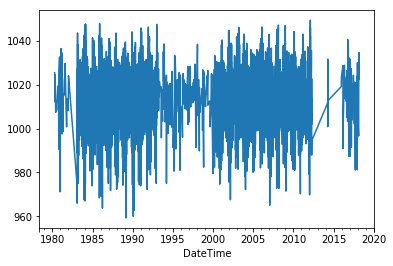

In [7]:
#we are going to fill the missing data in presure in the different series 
df['Esbjerg']['Pressure'].plot()#this function show us the missing data in Esbjerg  ! 
#this will drop from df the pressure of Esbjerg and Roskilde 

df.drop(('Esbjerg', 'Pressure'), axis=1, inplace=True)
df.drop(('Roskilde', 'Pressure'), axis=1, inplace=True)


In [8]:
#this will add some data ! 
#the day of the year = > winter or summer for exemple! 
#and the hour => atnight or on day  
df['Various', 'Day'] = df.index.dayofyear
df['Various', 'Hour'] = df.index.hour
df.head(10)


Aalborg                                        Aarhus  \
                         Temp     Pressure  WindSpeed     WindDir      Temp   
DateTime                                                                      
1980-03-01 11:00:00  5.000000  1007.766667  10.200000  280.000000  5.000000   
1980-03-01 12:00:00  5.000000  1008.000000  10.300000  290.000000  5.000000   
1980-03-01 13:00:00  5.000000  1008.066667   9.700000  290.000000  5.000000   
1980-03-01 14:00:00  4.333333  1008.133333  11.100000  283.333333  5.000000   
1980-03-01 15:00:00  4.000000  1008.200000  11.300000  280.000000  5.000000   
1980-03-01 16:00:00  4.000000  1008.766667   8.866667  290.000000  4.000000   
1980-03-01 17:00:00  3.000000  1009.333333  10.100000  283.333333  3.000000   
1980-03-01 18:00:00  3.000000  1009.900000   8.200000  280.000000  2.000000   
1980-03-01 19:00:00  3.000000  1010.266667   7.866667  280.000000  1.666667   
1980-03-01 20:00:00  3.000000  1010.633333   7.533333  280.000000  1.333333   

                                                     Esbjerg             \
                        Pressure WindSpeed WindDir      Temp  WindSpeed   
DateTime                                                                  
1980-03-01 11:00:00  1008.300000      15.4   290.0  6.083333  12.383333   
1980-03-01 12:00:00  1008.600000      13.4   280.0  6.583333  12.883333   
1980-03-01 13:00:00  1008.433333      15.4   280.0  6.888889  13.244444   
1980-03-01 14:00:00  1008.266667      14.9   300.0  6.222222  12.911111   
1980-03-01 15:00:00  1008.100000      17.0   290.0  5.555556  12.577778   
1980-03-01 16:00:00  1008.500000      15.4   290.0  4.988889  12.133333   
1980-03-01 17:00:00  1008.900000      14.9   290.0  4.922222  11.263095   
1980-03-01 18:00:00  1009.300000      15.4   290.0  4.855556  11.041667   
1980-03-01 19:00:00  1009.600000      13.7   290.0  4.788889  10.820238   
1980-03-01 20:00:00  1009.900000      12.0   290.0  4.722222  10.598810   

                                   Odense                                      \
                        WindDir      Temp     Pressure  WindSpeed     WindDir   
DateTime                                                                        
1980-03-01 11:00:00  310.000000  6.142857  1011.066667  12.585714  290.000000   
1980-03-01 12:00:00  310.000000  7.000000  1011.200000  11.300000  290.000000   
1980-03-01 13:00:00  309.444444  7.000000  1011.300000  12.118182  290.000000   
1980-03-01 14:00:00  306.111111  6.857143  1011.400000  12.742857  290.000000   
1980-03-01 15:00:00  302.777778  6.000000  1011.500000  12.400000  290.000000   
1980-03-01 16:00:00  301.666667  4.909091  1011.688889  12.618182  295.454545   
1980-03-01 17:00:00  309.880952  3.953488  1011.877778  12.646512  299.302326   
1980-03-01 18:00:00  309.166667  3.674419  1012.066667  11.725581  295.116279   
1980-03-01 19:00:00  308.452381  3.395349  1012.255556  10.804651  290.930233   
1980-03-01 20:00:00  307.738095  3.116279  1012.444444   9.883721  286.744186   

                     Roskilde                        Various       
                         Temp  WindSpeed     WindDir     Day Hour  
DateTime                                                           
1980-03-01 11:00:00  5.000000  11.466667  280.000000      61   11  
1980-03-01 12:00:00  5.000000  12.466667  280.000000      61   12  
1980-03-01 13:00:00  5.166667  13.133333  278.333333      61   13  
1980-03-01 14:00:00  5.833333  12.300000  270.000000      61   14  
1980-03-01 15:00:00  4.833333  12.300000  270.000000      61   15  
1980-03-01 16:00:00  3.833333  12.300000  270.000000      61   16  
1980-03-01 17:00:00  2.986111  12.263889  270.000000      61   17  
1980-03-01 18:00:00  2.902778  12.047222  270.000000      61   18  
1980-03-01 19:00:00  2.819444  11.830556  270.000000      61   19  
1980-03-01 20:00:00  2.736111  11.613889  270.000000      61   20

Lançons nous vers la cible c'est quoi notre cible dans ce model ! 
nous allons prédire les mesures décrite dans df de la ville Odense ! 
Alors nous allons faire la prédiction de 24 heure par exmeple ! 
et comme nos données sont rangé chaque heure (rasembled) donc nous aurons à décaler 
24 fois ! 
comme vu déja nous allons décaler avec un nombre négative de pas ! 


In [9]:
Ville_cible="Odense"

Mesures_cible=["Temp","WindSpeed","Pressure"]
#shif_time !
shift_days=1 #on peut changer cette variable! 
shift_time = shift_days * 24 #24h par jour logique  ! 
#the shiffting ! 
#nous allons prédire un autre df ! 
# shift(-) = prédire le future ! 
#shift (+) = prédire le passé! n'oublier pas ça

print(df["Odense"][Mesures_cible].tail(30))
df_cibles=df[Ville_cible][Mesures_cible].shift(-int(shift_time)) 
df_cibles.tail(30)

                     Temp  WindSpeed  Pressure
DateTime                                      
2018-02-28 18:00:00  -6.0       9.80    1032.9
2018-02-28 19:00:00  -6.3       9.30    1032.8
2018-02-28 20:00:00  -6.6      10.80    1032.6
2018-02-28 21:00:00  -6.9       9.80    1032.4
2018-02-28 22:00:00  -7.0       9.30    1032.3
2018-02-28 23:00:00  -7.0      10.30    1031.9
2018-03-01 00:00:00  -6.8      10.05    1031.6
2018-03-01 01:00:00  -6.6       9.80    1031.3
2018-03-01 02:00:00  -6.5       9.30    1030.7
2018-03-01 03:00:00  -6.2       8.20    1029.6
2018-03-01 04:00:00  -6.1       8.80    1028.9
2018-03-01 05:00:00  -6.0       7.70    1028.3
2018-03-01 06:00:00  -5.9       8.20    1027.7
2018-03-01 07:00:00  -5.6       8.20    1027.3
2018-03-01 08:00:00  -5.3       8.20    1026.5
2018-03-01 09:00:00  -5.1       9.30    1026.0
2018-03-01 10:00:00  -4.8       9.30    1025.6
2018-03-01 11:00:00  -4.2       9.80    1024.9
2018-03-01 12:00:00  -3.1       8.80    1024.1
2018-03-01 13

,Temp,WindSpeed,Pressure
DateTime,,,
2018-02-28 18:00:00,-3.9,7.7,1020.8
2018-02-28 19:00:00,-4.4,8.8,1020.4
2018-02-28 20:00:00,-5.0,8.2,1019.8
2018-02-28 21:00:00,-5.2,7.7,1019.2
2018-02-28 22:00:00,-5.0,8.8,1018.7
2018-02-28 23:00:00,-4.7,9.3,1018.3
2018-03-01 00:00:00,NaN,NaN,NaN
2018-03-01 01:00:00,NaN,NaN,NaN
2018-03-01 02:00:00,NaN,NaN,NaN


Logiquement aprés ce décalage !  nous aurons  des cases vides ! 
pour les voir  : df_cibles.tail()
saha ! maintenant nous allons déffinire nos numpy arrays pour construire le model !!! 



In [10]:
x_data = df.values[0:-shift_time] #la taille de df était grande aprés le shifft nous avons eu des NAN 
print("Shape:", x_data.shape) #pour voir la taille de l'entré  qui doit etre égale à la taille des cibles  !! 
y_data=df_cibles.values[:-shift_time] #ici 
print("Shape:", y_data.shape)
#le nombre de données ! 
num_data =  len(x_data)

# the train_split ! 
train_split=0.9 #90% training data et 10% test_data 
#numbre de fois d'apprentissage ! 
num_train=int(train_split*num_data)
#nombre de fois de test  ! 
num_test=num_data - num_train 
# maintenant les x_train et x_test ! 
x_train= x_data[0:num_train] # de la ligne 0  jusqu'à la ligne num_train-1
x_test=x_data[num_train:]#de num_train jusqu'a la fin ! 
#y_train et y_test 
y_train=y_data[0:num_train]
y_test=y_data[num_train:]

#le nombre d'input  est le nombre de collonnes qui sont 20 ! 4mesures*5 villes



Shape: (333085, 20)
Shape: (333085, 3)


In [13]:
num_x_inputs=x_data.shape[1]
num_x_inputs

20

In [14]:
num_y_outputs=y_data.shape[1] 
num_y_outputs


3

Aprés avoir séparer les inputs des outputs et the training data and the test data ! 
nous allons maintenant scaller nos données entre  -1 t 1 
en utilisant la fonction MinMaxScaler() qui nous un scaller à utiliser comme suite!


In [15]:
scaller =  MinMaxScaler() #MinMaxScaler :  mise à échelle suivant le min et le max du array passer en parametre ! en
#générale c'est entre 0 et 1 mais ici c 'est ntre -1 et 1  '
x_scaled_train = scaller.fit_transform(x_train)#Ajuster aux données, puis le transformer.
x_scaled_test = scaller.fit_transform(x_test)

y_scaled_train = scaller.fit_transform(y_train)
y_scaled_test= scaller.fit_transform(y_test)


Aprés avoir scaller nos données nous allons redurie le nombre d'observation pour l'apprentissage il y a presque 300k observation ! 
cette fonction fait en sorte que  aura des sequences de 8 semaines !
donc la taille d'une séquence=  24 * 7 * 8 
et avec un batch size  fixe qu'on fixera à 128 
 

In [16]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_inputs)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_outputs)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_scaled_train[idx:idx+sequence_length]
            y_batch[i] = y_scaled_train[idx:idx+sequence_length]
        
        yield (x_batch, y_batch) #yield est un return qui retourne un générateur , le générateur est 
        # présenter comme suite (x*x for x in range(3)) par exemple la necessité du générateur est de ne pâs 
        #tous charger en mémoire les iterables sont présenter comme ce ci [x*x for x in range(3)]
        

In [17]:
batch_size=128 
seq_len=24*7*8
generateur=batch_generator(batch_size,seq_len)
x_batch, y_batch= next(generateur)#The next() returns the next item from the iterator.
x_batch.shape,y_batch.shape



((128, 1344, 20), (128, 1344, 3))

In [26]:
validation_data = (np.expand_dims(x_scaled_test, axis=0),
                   np.expand_dims(y_scaled_test, axis=0))
print(np.expand_dims(x_scaled_test, axis=0).shape)
x_scaled_test.shape

(1, 33309, 20)


(33309, 20)

In [16]:
#le model ! 
#nous avons 3 couches ! GRU /LSTM , dense ! et Odense 
model =Sequential()

couche_1= LSTM(128,return_sequences=True,
              input_shape=(None, num_x_inputs))
model.add(couche_1)

couche_2=Dense(num_y_outputs, activation='sigmoid')
model.add(couche_2)
#la fonction sigmoid nous donne des valeurs de 0 à 1 ! 
#avec celle ci on est assez limité  avec la temperature du training data !! 
#donc nous devons initialiser les poids avec des valeurs aléatoires! 
# RandomUnit une donne des valeurs aléatoires qu'on passe à kernel_initializer avec une fonction d'activation  = linear (identité)
if False : 
    # j ai pas   compris pourquoi false !  
    from tensorflow.python.keras.initializers import RandomUniform
    
    unit=RandomUniform(minval=-0.05,maxval=0.05)
    couche_3=Dense(num_y_outputs,activation='linear',kernel_initializer=init)
    model.add(couche_3)


    
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 128)         76288     
_________________________________________________________________
dense (Dense)                (None, None, 3)           387       
Total params: 76,675
Trainable params: 76,675
Non-trainable params: 0
_________________________________________________________________


In [17]:
#compiler le modele ! 
opt =RMSprop(lr=1e-3) #vaut mieu laisser les paramtre par defaut ! sauf the leaurning rate 
#This optimizer is usually a good choice for recurrent neural networks.

loss='mean_squared_error'
model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])



In [18]:
#callbacks ! 

import time

NAME = "{}-Ville-{}-WithWindSpeed-LSTMNotGRU".format(Ville_cible,int(time.time()))  # a unique name for the model 

path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)
callback_tensorboard =TensorBoard(log_dir="logs/{}".format(NAME),
                                   histogram_freq=0,
                                   write_graph=False)
#reduces the learning-rate for the optimizer if the validation-loss has not improved since the last epoch 
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]


In [19]:

model.fit_generator(generator=generateur,
                    epochs=20,
                    steps_per_epoch=100,
                    validation_data=validation_data,
                    callbacks=callbacks)


Epoch 1/20
  2/100 [..............................] - ETA: 57:31 - loss: 0.0651 - acc: 0.16 - ETA: 55:19 - loss: 0.0444 - acc: 0.5288

KeyboardInterrupt: 

In keras, fit() is much similar to sklearn's fit method, where you pass array of features as x values and target as y values. You pass your whole dataset at once in fit method. Also, use it if you can load whole data into your memory (small dataset).

In fit_generator(), you don't pass the x and y directly, instead they come from a generator. As it is written in keras documentation, generator is used when you want to avoid duplicate data when using multiprocessing. This is for practical purpose, when you have large dataset.




In [ ]:
result = model.evaluate(x=np.expand_dims(x_scaled_test, axis=0),
                        y=np.expand_dims(y_scaled_test, axis=0))


In [ ]:
for res, metric in zip(result, model.metrics_names):
    print("{0}:{1}".format(metric, res))
    

In [ ]:
#COMPARAISON DE Y_TRUE avec Y_PRED avec cette fonction 
#en mode test ou en mode train 
def comparaison_plot(start_idx,length=100,train=True):
    end_idx= start_idx+length
    if train : 
        x= x_scaled_train[start_idx:end_idx]
        y=y_train[start_idx:end_idx]
    else : 
        x= x_scaled_test[start_idx:end_idx]
        y=y_test[start_idx:end_idx]
    x=np.expand_dims(x,axis=0)
    #la prediction est faite ici ! 
    y_pred=model.predict(x)
    y_rescaled_pred = scaller.inverse_transform(y_pred[0])#rendre les données à leur état normale ( enlever le scall )
    
    #pour chaque colone voir l'etat de y_pred par rapport a y_true ! 
    for col in range(int(len(Mesures_cible))):
        y_col_pred=y_rescaled_pred[:,col]
        y_col_true=y[:,col]
        
        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(y_col_true, label='true')
        plt.plot(y_col_pred, label='pred')
        
        # Plot grey box for warmup-period.
        warmup_steps = 50

        #p = plt.axvspan(0,warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(Mesures_cible[col])
        plt.legend()
        plt.show()
    
    
    

In [ ]:
comparaison_plot(start_idx=100000, length=1000, train=True)


In [ ]:
plot_comparison(start_idx=200, length=1000, train=False)


In [ ]:
comparaison_plot(start_idx=200000, length=1000, train=True)


In [ ]:
comparaison_plot(start_idx=200, length=1000, train=False)


Remove the wind-speed from the target-data. Does it improve prediction for the temperature and pressure?
Train for more epochs, possibly with a lower learning-rate. Does it improve the performance on the test-set?
Try a different architecture for the neural network, e.g. higher or lower state-size for the GRU layer, more GRU layers, dense layers before and after the GRU layers, etc.
Use hyper-parameter optimization from Tutorial #19.
Try using longer and shorter sequences for the batch-generator.
Try and remove the city "Odense" from the input-signals.
Try and add last year's weather-data to the input-signals.
How good is the model at predicting the weather 3 or 7 days into the future?
Can you train a single model with the output-signals for multiple time-shifts, so that a single model predicts the weather in e.g. 1, 3 and 7 days.
Explain to a friend how the program works.

esseyons LSTM à la place de GRU 
